In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2), #S4
    keras.layers.Conv2D(120, kernel_size=1, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [7]:
lenet_5_model.compile (optimizer = 'adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [10]:
history=lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0215 - val_accuracy: 0.9942
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0196 - val_accuracy: 0.9942
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0197 - val_accuracy: 0.9942
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0179 - val_accuracy: 0.9956


In [9]:
lenet_5_model.evaluate (test_x, test_y) 


313/313 [==============================] - 4s 12ms/step - loss: 0.0462 - accuracy: 0.9868


[0.04623677209019661, 0.9868000149726868]

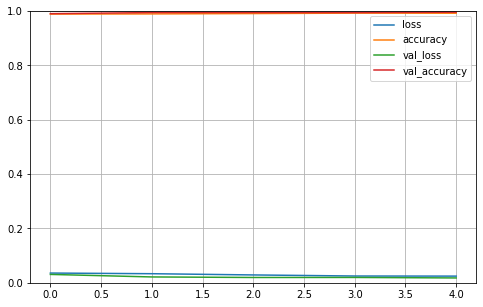

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()